# Fake News Identification

Data from [Kaggle](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset). As pointed out [here](https://www.kaggle.com/josutk/only-one-word-99-2), the dataset is extremely skewed, explaining our 99.65% accuracy with only logistic regression.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

fake_data = pd.read_csv('../../data/fake_news/Fake.csv')
true_data = pd.read_csv('../../data/fake_news/True.csv')

### Preprocessing

In [2]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
fake_data['label'] = 0
true_data['label'] = 1

data = pd.concat([fake_data, true_data])

In [4]:
data

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [6]:
print(fake_data['subject'].value_counts())
print(true_data['subject'].value_counts())

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64
politicsNews    11272
worldnews       10145
Name: subject, dtype: int64


In [7]:
data = data.drop('subject', axis=1)

In [8]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data = data.drop('date', axis=1)

data.head()

,title,text,label,year,month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,2017.0,12.0


<AxesSubplot:xlabel='year', ylabel='count'>

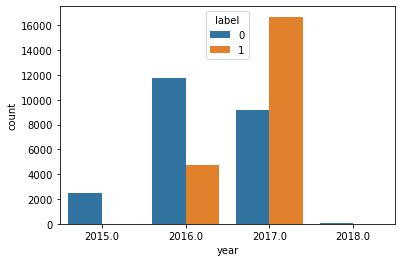

In [9]:
import seaborn as sns

sns.countplot(x='year', data=data, hue='label')

In [10]:
data = data.drop(['year', 'month'], axis=1)

data.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [11]:
data['text'] = data['title'] + ' ' + data['text']
data = data.drop('title', axis=1)
data.head()

,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


In [12]:
data.iloc[0]['text']

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this 

In [13]:
import nltk
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\preston\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
import re

def remove_stopwords(review):
  return [word.strip() for word in review if not word.strip() in stop]

def clean(review):
  review = review.lower().split()
  review = ' '.join(remove_stopwords(review))
  review = re.sub(r'[^\w\s]', '', review)
  # review = [lemmatizer.lemmatize(word) for word in review]

  return review

In [15]:
data['text'] = data['text'].apply(clean)
data.iloc[0]['text']

'donald trump sends embarrassing new years eve message disturbing donald trump wish americans happy new year leave that instead give shout enemies haters dishonest fake news media former reality show star one job it country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america also accept regaining contro

{'whiskers': [<matplotlib.lines.Line2D at 0x24a995aeb20>,
 'caps': [<matplotlib.lines.Line2D at 0x24a99585100>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a995ae850>],
 'medians': [<matplotlib.lines.Line2D at 0x24a99585550>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a99585820>],
 'means': []}

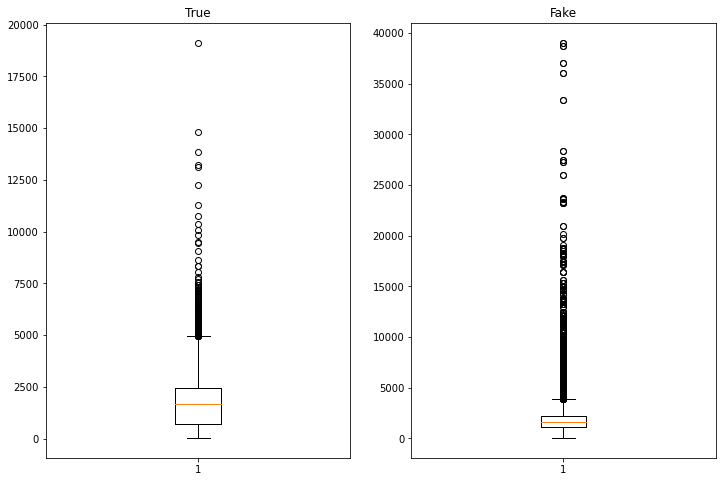

In [16]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

ax1.set_title('True')
ax1.boxplot(data[data['label']==1]['text'].str.len())

ax2.set_title('Fake')
ax2.boxplot(data[data['label']==0]['text'].str.len())

### Bag of Words + Logistic Regression

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
text_counts = cv.fit_transform(data['text'])

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  text_counts,
  data['label'].to_numpy(), 
  test_size=0.2
)

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, classification_report

pred = model.predict(X_test)

print('accuracy_score:', accuracy_score(y_test, pred))
print('f1_score:', f1_score(y_test, pred))
print('log_loss:', log_loss(y_test, pred))

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


accuracy_score: 0.9966592427616926
f1_score: 0.9965229485396384
log_loss: 0.1153870919160593
[[4651   16]
 [  14 4299]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4667
           1       1.00      1.00      1.00      4313

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

